# **ÍNDICE DE SUICÍDIOS COMETIDO POR IDOSOS NO BRASIL**

## Importação das dependencias

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Importação do dataset de suicidos**

* Dataset no link
https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016

#### Dicionário de Variáveis
O arquivo csv importado possui 12 colunas, provenientes da compilação dos 4 datasets mencionados acima. As variáveis são:

* **country**: país onde os dados foram registrados
101 países
* **year**: ano em que os dados foram registrados
1987 a 2016
* **sex**: sexo considerado no registro
male – masculino
female – feminino
* **age**: faixa etária considerada
5-14 anos
15-24 anos
25-34 anos
35-54 anos
55-74 anos
75+ anos

* **suicides_no**: número de suicídios
* **population**: população para o grupo
* **suicides/100k** pop: número de suicídios por 100 mil habitantes
* **country_year**: identificador contendo country + year
* **HDI for year**: Índice de Desenvolvimento Humano (IDH) para o ano
* **gdp_for_year**: Produto Interno Bruto (PIB) para o ano
* gdp_per_capita: Produto Interno Bruto (PIB) per capita

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv")

# **Analise Exploratória**

In [42]:
# ver o formato do DataFrame
print("Formato do DataFrame: ", df.shape)

# ver as 5 primeiras entradas dos dataset
df.head()

Formato do DataFrame:  (27820, 12)


country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [41]:
# extrair apenas os dados relativos ao Brasil
df_brasil = df[df.country == "Brazil"].copy()

# ver o formato do novo DataFrame
print("Formato do DataFrame: ", df_brasil.shape)

# exibir as 5 primeiras entradas do novo DataFrame
df_brasil.head()

Formato do DataFrame:  (372, 12)


country  year   sex          age  suicides_no  population  \
4172  Brazil  1985  male    75+ years          129      840300   
4173  Brazil  1985  male  55-74 years          535     5364900   
4174  Brazil  1985  male  35-54 years         1011    11986300   
4175  Brazil  1985  male  25-34 years          791    10762900   
4176  Brazil  1985  male  15-24 years          661    13834000   

      suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
4172              15.35   Brazil1985         0.576    222,942,790,435   
4173               9.97   Brazil1985         0.576    222,942,790,435   
4174               8.43   Brazil1985         0.576    222,942,790,435   
4175               7.35   Brazil1985         0.576    222,942,790,435   
4176               4.78   Brazil1985         0.576    222,942,790,435   

      gdp_per_capita ($)       generation  
4172                1898  G.I. Generation  
4173                1898  G.I. Generation  
4174                1898           Silent  
4175                1898          Boomers  
4176                1898     Generation X

## Criado um DataFrame somente com dados de pessoas idosas

In [46]:
# Faz uma cópida do dataset
df_aged = df.copy()

#Apaga dados das pessoas jovens para analisar dados de pessoas idosas
df_aged.drop(df_aged[ df_aged['generation'] != 'G.I. Generation' ].index , inplace=True)


#DF somente idodos do brasil
df_aged_brasil = df_aged[df_aged.country == "Brazil"].copy()

df_aged.head()

country  year     sex          age  suicides_no  population  \
3   Albania  1987    male    75+ years            1       21800   
5   Albania  1987  female    75+ years            1       35600   
8   Albania  1987    male  55-74 years            1      137500   
10  Albania  1987  female  55-74 years            0      144600   
12  Albania  1988  female    75+ years            2       36400   

    suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
3                4.59  Albania1987           NaN      2,156,624,900   
5                2.81  Albania1987           NaN      2,156,624,900   
8                0.73  Albania1987           NaN      2,156,624,900   
10               0.00  Albania1987           NaN      2,156,624,900   
12               5.49  Albania1988           NaN      2,126,000,000   

    gdp_per_capita ($)       generation  
3                  796  G.I. Generation  
5                  796  G.I. Generation  
8                  796  G.I. Generation  
10                 796  G.I. Generation  
12                 769  G.I. Generation

## Tendência da taxa de suicídio no Brasil(Todas as idades)


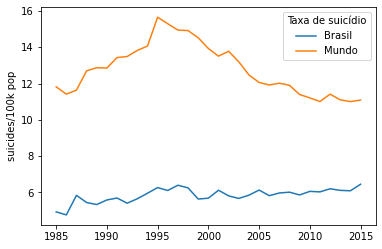

In [79]:
# pegar a media mundial e do Brasil em suicidios por 100 mil habitantes
years = df_brasil.year.unique()    # pegar os anos para o eixo x
suicides_brasil_mean = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

# como o Brasil nao tem 2016, vou eliminar do dataframe mundial essa entrada
suicides_world_mean.drop(2016, inplace=True)

# plotar lineplot comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

Uma coisa que é facilmente percebida no gráfico acima é que apesar da taxa de suicídios no Brasil ser menor que a média mundial, ela vem crescendo constantemente ao longo de 30 anos.

A linha laranja(Mundo) teve um pico por volta de 1995, porém reverteu e vem caindo ano após ano. Já a linha azul (Brasil) tem um slope positivo praticamente ao longo de todo o período analisado.

## Tendência da taxa de suicídio entre idosos no Brasil

Para essa idade o dataset possui dados somente até o ano 2000

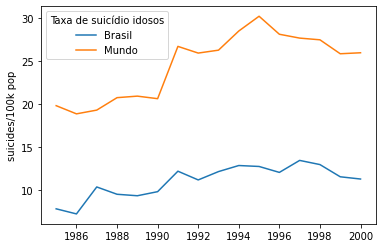

In [82]:
# pegar a media mundial e do Brasil em suicidios
years_aged = df_aged_brasil.year.unique()    # pegar os anos para o eixo x
suicides_brasil_mean_aged = df_aged_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean_aged = df_aged.groupby('year')['suicides/100k pop'].mean()


# plotar lineplot comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years_aged, y=suicides_brasil_mean_aged, label='Brasil')
ax = sns.lineplot(x=years_aged, y=suicides_world_mean_aged, label='Mundo')
plt.legend(title="Taxa de suicídio idosos")
plt.show()

Uma coisa que é facilmente percebida no gráfico acima é que apesar da taxa de suicídios no Brasil entre idosos ser menor que a média mundial, ela vem crescendo constantemente ao longo de 30 anos.

A linha laranja(Mundo) teve um pico por volta de 1995, porém reverteu e vem caindo ano após ano. Já a linha azul (Brasil) tem um slope positivo praticamente ao longo de todo o período analisado.

In [56]:
years_aged

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000])

## Faixa etária com maior índice de suícidio

In [71]:
# criar uma tabela dinâmica
table = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])

# reordenar as tableas para deixar em ordem crescente
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

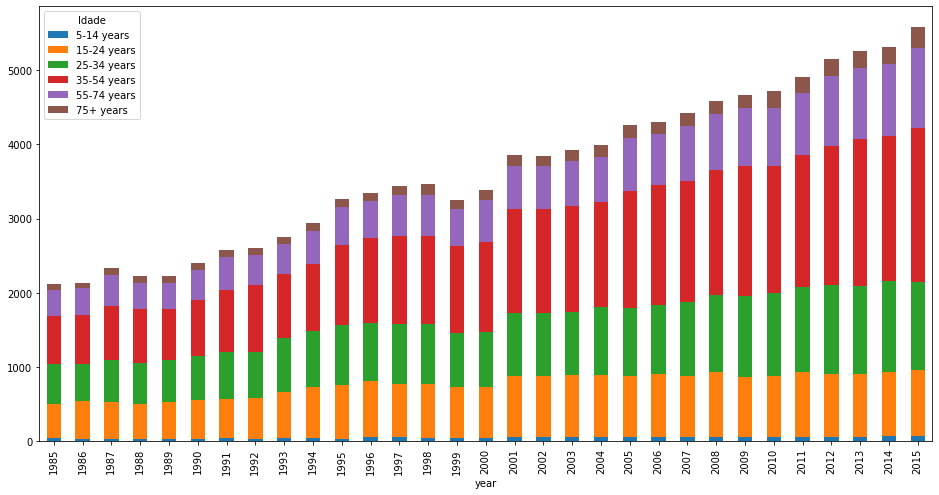

In [72]:
# plotar a pivot table das faixas etárias
table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

Mesmo visualmente é fácil identificar que o grupo de pessoas que mais cometem suicídio está entre 35-54 anos. Em segundo lugar, estão pessoas entre 25-34 anos de idade.

Juntos, esses dois grupos correspondem a quase 60% dos registros do banco de dados.

Um outro ponto que vale a pena ressaltar é o aumento de casos entre pessoas acima de 55 anos. Em 1985, as pessoas com mais idade representavam uma pequena fatia do número total.

Entretanto, em 2015 é nítido que mesmo para pessoas acima de 75 anos houve um incremento significativo no número de suicídios.

## Taxa de suicidios entre homens e mulheres no Brasil(Idosos)

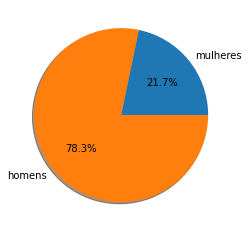

In [74]:
# extrair valores entre homens e mulheres
homens_mulheres = df_aged_brasil.groupby('sex').suicides_no.sum() / df_aged_brasil.groupby('sex').suicides_no.sum().sum()

# plotar o gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

Uma outra análise de grande importância é ver a porcentagem dos suicídios entre homens e mulheres.

Analisando-se todo o período, o dataset utilizado mostrou que aproximadamente 78% dos casos foram cometidos por homens e 22% deles por mulheres.

## Taxa de suicidios entre homens e mulheres no Mundo (Idosos)

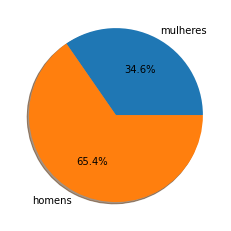

In [83]:
# extrair valores entre homens e mulheres
homens_mulheres = df_aged.groupby('sex').suicides_no.sum() / df_aged.groupby('sex').suicides_no.sum().sum()

# plotar o gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

Analisando-se todo o período, o dataset utilizado mostrou que aproximadamente 65% dos casos foram cometidos por homens e 34% deles por mulheres.